In [33]:
import numpy as np
import pandas as pd
import csv
import mysql.connector
from datetime import date, datetime
import random
import time
import matplotlib.pyplot as plt

In [34]:
class Lotofacil:
    def __init__(self):
        self.id = 0
        self.data_sorteio = None
        self.ganhadores_15_numeros = 0
        self.valor_rateio_15_numeros = 0
        self.valor_rateio_14_numeros = 0
        self.valor_rateio_13_numeros = 0
        self.valor_rateio_12_numeros = 0
        self.valor_rateio_11_numeros = 0
        self.numeros = ()
        self.par = 0
        self.impar = 0
        self.sequencia = ()
        self.vertical = ()
        self.horizontal = ()
        
    def setParImpar(self):
        self.par = sum([1 if x % 2 == 0 else 0 for x in self.numeros])
        self.impar = len(self.numeros) - self.par

In [87]:
class Jogo:
    def __init__(self):
        self.id = None
        self.data_cadastro = None
        self.quantidade = 0
        self.numeros = ()
        self.par = 0
        self.impar = 0
        self.sequencia = ()
        self.vertical = ()
        self.horizontal = ()
        
#     def sorteio(self, qtdNumeros = 15):
#         self.numeros = sorted(tuple(np.random.choice(np.arange(1, 26), qtdNumeros, replace= False)))
#         self.setQuantidade()
#         self.setParImpar()
        
#     def setQuantidade(self):
#         self.quantidade = len(self.numeros)

    def set_numeros(self, numeros):
        self.numeros = tuple(numeros)
        self.setParImpar()
        self.set_sequencia()
        
    def setParImpar(self):
        self.par = sum([1 if x % 2 == 0 else 0 for x in self.numeros])
        self.impar = len(self.numeros) - self.par
        
    def set_sequencia(self):
        sequencia = []
        count = []

        for i in np.arange(len(self.numeros)):
            if (i == 0):
                sequencia.append(self.numeros[i])
            else:
                num = None
                
                if (len(sequencia) == 1):
                        if (self.numeros[i] == sequencia[0] + 1):
                            num = 
                if (self.numeros[i] == sequencia[::-1][0] + 1):
                    sequencia.append(self.numeros[i])
                else:
                    count.append(len(sequencia))
                    sequencia = []
                    
        self.sequencia = sorted(tuple(sequencia))

In [96]:
len(sequencia)


TypeError: object of type 'int' has no len()

In [36]:
def get_concursos_lotofacil_csv(arquivo):
    concursos = []
    
    with open(arquivo) as file:
        lotofacil = csv.reader(file, delimiter=';')
        data = list(lotofacil)
    
    for x in data[1:]:
        concurso = Lotofacil()
        concurso.id = int(x[0])
        concurso.data_sorteio = x[1]
        concurso.numeros = sorted(list(map(int, x[2:17])))
        concurso.ganhadores_15_numeros = int(x[17])
        concurso.valor_rateio_15_numeros = float(x[18].replace('.', '').replace(',', '.'))
        concurso.valor_rateio_14_numeros = float(x[19].replace('.', '').replace(',', '.'))
        concurso.valor_rateio_13_numeros = float(x[20].replace('.', '').replace(',', '.'))
        concurso.valor_rateio_12_numeros = float(x[21].replace('.', '').replace(',', '.'))
        concurso.valor_rateio_11_numeros = float(x[22].replace('.', '').replace(',', '.'))
        concurso.setParImpar()
        concursos.append(concurso)
    
    return tuple(concursos)

In [37]:
def gerar_jogos(numero_jogos = 1000, numeros_por_jogo = 15, menor_numero = (), maior_numero = ()):
    count = 0
    jogos = []
    tentativas = 0
    
    try:
    
        while (len(jogos) < numero_jogos and tentativas < 100):
            add = False
            jogo = Jogo()
            jogo.sorteio(numeros_por_jogo)

            if (jogo.numeros[0] not in menor_numero or jogo.numeros[-1] not in maior_numero):
                tentativas += 1
                continue

            for i in jogos:
                if (len(i.numeros) == len(jogo.numeros)):
                    if (len(set(i.numeros).intersection(jogo.numeros)) == len(jogo.numeros)):
                        tentativas += 1
                        break

            jogos.append(jogo)
            count += 1
            tentativas = 0
            
        return tuple(jogos)
            
    except Exception as ex:
        return ex

In [38]:
def filtrar_concursos_por_numero(concursos, inicial, final):
    concursos_filtrados = []
    
    for c in concursos:
        if (c.id >= inicial and c.id <= final):
            concursos_filtrados.append(c)
    
    return concursos_filtrados

In [39]:
def filtrar_ultimos_concursos(concursos, ultimos):
    concursos_filtrados = []
    
    if (ultimos is not None):
        concursos_filtrados = concursos[len(concursos)-ultimos:]
        
    return concursos_filtrados

In [40]:
def filtrar_concurso_por_numeros(concursos, numeros):
    concursos_filtrados = []
    
    for c in concursos:
        if (len(set(c.numeros).intersection(numeros)) == len(numeros)):
            concursos_filtrados.append(c)
#         if len(set(apostas[i].numeros).intersection(notin[j])) == len(notin[j]):
    
    return concursos_filtrados

In [41]:
def imprimir_concursos(concursos):
    print("Total concursos: %s \n" % (len(concursos)))
    for c in concursos:
        print("Concurso: ", c.id)
        print("Data Sorteio: ", c.data_sorteio)
        print("Ganhadores 15 pontos: %s " % (c.ganhadores_15_numeros))
        print("Impares: %s"% (c.impar))
        print("Pares: %s" % (c.par))
        print("Sequencia: %s" % (c.sequencia))
        print(c.numeros)
        print("\n")

In [42]:
def imprimir_aposta(apostas):
    print("Total apostas: %s \n" % (len(apostas)))
    for a in apostas:
#         print("ID: ", a.id)
#         print("Data: ", a.data_sorteio)
        print("Impares: %s - Pares: %s" % (a.impar, a.par))
        print(a.numeros)
        print("\n")

In [43]:
def imprimir_jogo(jogos):
    print("Total jogos: %s \n" % (len(jogos)))
    for a in jogos:
        print("ID: ", a.id)
        print("Data Cadastro: ", a.data_cadastro)
        print("Numeros: %s - Impares: %s - Pares: %s | Sequencia: %s" % (len(a.numeros), a.impar, a.par, a.sequencia))
        print(a.numeros)
        print("\n")

In [44]:
def filtrar_jogo_menor_maior(jogos, menor = (), maior = ()):
    apostas_filtradas = []
    
    if (type(menor) != tuple):
        menor = tuple(menor)

    for jogo in jogos:
        if (jogo.numeros[0] in menor and jogo.numeros[-1] in maior):
            apostas_filtradas.append(jogo)
        
    return tuple(apostas_filtradas)

In [45]:
def filtrar_jogo_impar_par(jogos, impar = ()):
    apostas_filtradas = []
    
    for jogo in jogos:
        for i in impar:
            if (jogo.impar == i):
                apostas_filtradas.append(jogo)
        
    return tuple(apostas_filtradas)

In [46]:
def filtrar_jogo_por_numeros(jogos, numeros, match):
    apostas_filtradas = []
    
    for j in jogos:
        if (len(set(j.numeros).intersection(numeros)) >= match):
            apostas_filtradas.append(j)
        
    return apostas_filtradas

In [47]:
# def filtrar_jogo_sequencia(jogos, sequencia = ()):
#     apostas_filtradas = []
#     add = True
    
#     for jogo in jogos:
#         for s in sequencia:
#             if (len(set(jogo.numeros).intersection(s)) == len(s)):
#                 add = False
#                 break
                
#         if (add):
#             apostas_filtradas.append(jogo)
        
#     return tuple(apostas_filtradas)

In [48]:
def filtrar_jogo_sequencia(jogos, sequencia = ()):
    apostas_filtradas = []
    
    for jogo in jogos:
        if (len(set(jogo.numeros).intersection(sequencia)) == len(s)):
            apostas_filtradas.append(jogo)
        
    return tuple(apostas_filtradas)

In [49]:
def filtrar_jogo_notin(jogos, numeros):
    apostas_filtradas = []
    
    for j in jogos:
        if (len(set(j.numeros).intersection(numeros)) == 0):
            apostas_filtradas.append(j)
        
    return apostas_filtradas

In [50]:
def selecionar_jogos_aposta(jogos, quantidade):
    jogos_sample = random.sample(jogos, quantidade)
    menor_1 = 0
    menor_2 = 0
    menor_3 = 0
    impar_7 = 0
    impar_8 = 0
    impar_9 = 0
    seq_0 = 0
    seq_5 = 0
    seq_6 = 0
    seq_7 = 0

    for a in jogos_sample:
#         print(a.numeros, a.impar, a.par, a.numeros[0], a.numeros[-1])
        if a.numeros[0] == 1:
            menor_1 += 1
        elif a.numeros[0] == 2:
            menor_2 += 1
        elif a.numeros[0] == 3:
            menor_3 += 1

        if a.impar == 7:
            impar_7 += 1
        elif a.impar == 8:
            impar_8 += 1
        elif a.impar == 9:
            impar_9 += 1
            
        if a.sequencia == 0:
            seq_0 += 1
        elif a.sequencia == 5:
            seq_5 += 1
        elif a.sequencia == 6:
            seq_6 += 1
        elif a.sequencia == 7:
            seq_7 += 1

    print('Percentual jogos com 1: ', (menor_1/len(jogos_sample))*100)
    print('Percentual jogos com 2: ', (menor_2/len(jogos_sample))*100)
    print('Percentual jogos com 3: ', (menor_3/len(jogos_sample))*100)
    print('Percentual jogos impar 7: ', (impar_7/len(jogos_sample))*100)
    print('Percentual jogos impar 8: ', (impar_8/len(jogos_sample))*100)
    print('Percentual jogos impar 9: ', (impar_9/len(jogos_sample))*100)
    print('Sequencia 0: ', (seq_0/len(jogos_sample))*100)
    print('Sequencia 5: ', (seq_5/len(jogos_sample))*100)
    print('Sequencia 6: ', (seq_6/len(jogos_sample))*100)
    print('Sequencia 7: ', (seq_7/len(jogos_sample))*100)

    return jogos_sample

In [51]:
def conexao_mysql():
    return mysql.connector.connect(user='root', database='lotofacil', host='192.168.56.100', password='Zaq1@wsX')

In [52]:
def get_numeros_jogo(jogo_id):
    numeros = []
    
    try:
        cnx = conexao_mysql()
        cursor = cnx.cursor()

        query = ("SELECT numero FROM numero_jogo "
                 "WHERE jogo_id = %(jogo_id)s "
                 "ORDER BY numero")
        
        param_query = {
            'jogo_id' : jogo_id,
        }
 
        cursor.execute(query, param_query)

        rows = cursor.fetchall()
        
        for row in rows:
            numeros.append(row[0])

    except Exception as ex:
        print(ex)
 
    except ConnectionError as e:
        print(e)
 
    finally:
        cursor.close()
        cnx.close()

    return tuple(numeros)

In [53]:
# def get_numeros_jogo(jogo_id, numeros =()):
#     numeros = []
    
#     try:
#         cnx = conexao_mysql()
#         cursor = cnx.cursor()

#         query = ("SELECT numero FROM numero_jogo "
#                  "WHERE jogo_id = %(jogo_id)s "
#                  "AND numero in %(numeros)s "
#                  "ORDER BY numero")
        
#         param_query = {
#             'jogo_id' : jogo_id,
#         }
 
#         cursor.execute(query, param_query)

#         rows = cursor.fetchall()
        
#         for row in rows:
#             numeros.append(row[0])

#     except Exception as ex:
#         print(ex)
 
#     except ConnectionError as e:
#         print(e)
 
#     finally:
#         cursor.close()
#         cnx.close()

#     return tuple(numeros)

In [54]:
def get_all_jogos():
    jogos = []
    cursor = None
    cnx = None
    
    try:
        cnx = conexao_mysql()
        cursor = cnx.cursor()

        query = ("SELECT jogo_id, data_cadastro "
                 "FROM jogo "
#                  "WHERE jogo_id < 10001 "
                 "ORDER BY jogo_id")
        
        cursor.execute(query)
        
        rows = cursor.fetchall()
        
        for row in rows:
            jogo = Jogo()
            jogo.id = row[0]
            jogo.data_cadastro = row[1]
            jogo.numeros = get_numeros_jogo(row[0])
            jogo.setParImpar()
            jogo.setQuantidade()
            jogos.append(jogo)
    #         print(jogo_id, data_cadastro)

    except Exception as ex:
        print(ex)
        
    except ConnectionError as e:
        print(e)
        
    finally:
        cursor.close()
        cnx.close()
    
    return jogos

In [55]:
# def get_jogos(numeros = ()):
#     jogos = []
#     cursor = None
#     cnx = None
    
#     try:
#         cnx = conexao_mysql()
#         cursor = cnx.cursor()

#         query = ("SELECT jogo_id, data_cadastro "
#                  "FROM jogo "
# #                  "WHERE jogo_id < 10001 "
#                  "ORDER BY jogo_id")
        
#         cursor.execute(query)
        
#         rows = cursor.fetchall()
        
#         for row in rows:
#             jogo = Jogo()
#             jogo.id = row[0]
#             jogo.data_cadastro = row[1]
#             jogo.numeros = get_numeros_jogo(row[0])
#             jogo.setParImpar()
#             jogo.setQuantidade()
#             jogos.append(jogo)
#     #         print(jogo_id, data_cadastro)

#     except Exception as ex:
#         print(ex)
        
#     except ConnectionError as e:
#         print(e)
        
#     finally:
#         cursor.close()
#         cnx.close()
    
#     return jogos

In [56]:
def insert_jogo(jogo):
    try:
        cnx = conexao_mysql()
        cursor = cnx.cursor()
       
        add_jogo = ("INSERT INTO jogo "
                     "(data_cadastro) "
                     "VALUES (%(data_cadastro)s)")
        add_numero_jogo = ("INSERT INTO numero_jogo "
                            "(jogo_id, numero) "
                            "VALUES (%(jogo_id)s, %(numero)s)")

        data_jogo = {
            'data_cadastro' : datetime.now().date(),
        }

        cursor.execute(add_jogo, data_jogo)
        jogo_id = cursor.lastrowid
        
#         numeros = [(jogo_id, numero) for numero in j.numeros]

        for numero in jogo.numeros:
            data_numero_jogo = {
              'jogo_id': jogo_id,
              'numero': int(numero),
            }
            
            cursor.execute(add_numero_jogo, data_numero_jogo)

#         data_numero_jogo = {
#           'jogo_id': jogo_id,
#           'numero': jogo.numeros,
#         }

#         cursor.execute(add_numero_jogo, data_numero_jogo)
        
        cnx.commit()
        
    except Exception as ex:
        cnx.rollback()
        return ex
        
    finally:
        cursor.close()
        cnx.close()

In [57]:
def salvar_jogos(jogos):
    total_salvos = 0
    
    try:
        jogos_db = get_all_jogos()
        
        for jogo in jogos:
            add = True
            
            for jogo_db in jogos_db:
                if (len(jogo.numeros) == len(jogo_db.numeros)):
                    if (len(set(jogo.numeros).intersection(jogo_db.numeros)) == len(jogo.numeros)):
                        add = False
                        break

            if (add):
                insert_jogo(jogo)
                total_salvos += 1
                
    except Exception as ex:
        print(ex)
        
    finally:
        print("%s jogos gravados." % (total_salvos))
        print("%s jogos repetidos." % (len(jogos) - total_salvos))

In [58]:
def frequencia_concursos(concursos):
    frequencia = dict.fromkeys(range(1, 26), 0)

    for c in concursos:
        for n in c.numeros:
            frequencia[n] += 1

    return frequencia

In [59]:
def atraso_concursos(concursos):
    atraso = dict.fromkeys(range(1, 26), 0)

    for c in concursos:
        for n in atraso.keys():
            if (n in c.numeros):
                atraso[n] = 0
            else:
                atraso[n] += 1

    return atraso

In [60]:
# variaveis globais
# min_numeros_aposta = 15
# max_numeros_aposta = 18

In [ ]:
# while True:
#     try:
#         numerosAposta = int(input('Quantidade de números por aposta: '))
#         if numerosAposta < 15 or numerosAposta > 18:
#             raise ValueError('Digite um valor entre 15 e 18!')
#     except ValueError as e:
#         print(e)
#         continue
#     except:
#         print('Erro desconhecido!')
#         continue
#     else:
#         break

# Concursos

In [61]:
concursos = get_concursos_lotofacil_csv('lotofacil_data/lotofacil.csv')

In [62]:
# imprimir_concursos(concursos)

In [63]:
concursos_last = filtrar_ultimos_concursos(concursos, 50)

In [64]:
imprimir_concursos(concursos_last[::-1])

Total concursos: 50 

Concurso:  1656
Data Sorteio:  30/04/2018
Ganhadores 15 pontos: 3 
Impares: 9
Pares: 6


TypeError: not enough arguments for format string

In [ ]:
# concursos_v2 = filtrar_concurso_por_numeros(concursos, [20,21,22,23,24,25])
# imprimir_concursos(concursos_v2)

In [32]:
frequencia = frequencia_concursos(concursos_last)
print(frequencia)

{1: 26, 2: 31, 3: 35, 4: 32, 5: 29, 6: 29, 7: 32, 8: 29, 9: 32, 10: 33, 11: 26, 12: 27, 13: 28, 14: 35, 15: 29, 16: 26, 17: 32, 18: 29, 19: 27, 20: 35, 21: 22, 22: 35, 23: 25, 24: 34, 25: 32}


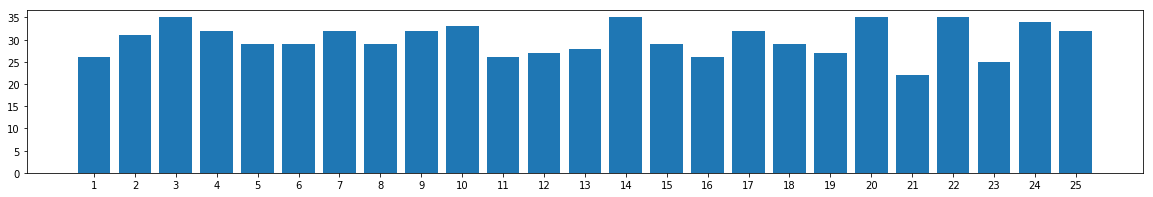

In [33]:
plt.figure(figsize=(20, 3))
plt.bar(frequencia.keys(), frequencia.values())
# plt.grid(True)
plt.xticks(range(1, len(frequencia) + 1), frequencia.keys())
plt.show()

In [34]:
atraso = atraso_concursos(concursos_last)
print(atraso)

{1: 1, 2: 0, 3: 0, 4: 0, 5: 0, 6: 1, 7: 0, 8: 5, 9: 7, 10: 0, 11: 0, 12: 0, 13: 0, 14: 1, 15: 0, 16: 1, 17: 0, 18: 1, 19: 0, 20: 0, 21: 3, 22: 1, 23: 0, 24: 0, 25: 2}


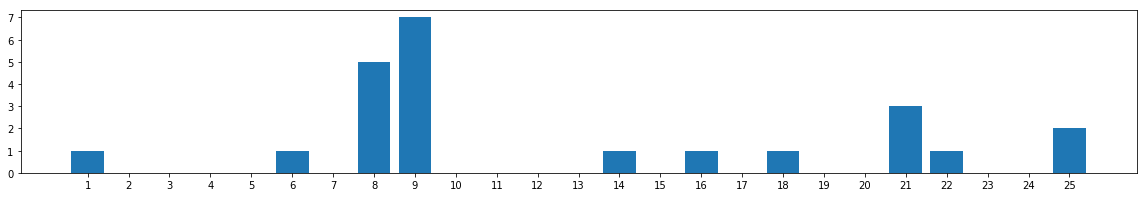

In [35]:
plt.figure(figsize=(20, 3))
plt.bar(atraso.keys(), atraso.values())
# plt.grid(True)
plt.xticks(range(1, len(atraso) + 1), atraso.keys())
plt.show()

In [36]:
impar_par = []

for c in concursos:
    if ([c.impar, c.par] not in impar_par):
        impar_par.append([c.impar, c.par])
        
impar_par = sorted(impar_par)

frequencia = [0] * len(impar_par)

for c in concursos:
    for i in range(len(impar_par)):
        if (c.impar == impar_par[i][0] and c.par == impar_par[i][1]):
            frequencia[i] += 1
    
# print(impar_par)

In [37]:
impar_par_lst = []

for i in impar_par:
    impar_par_lst.append(' - '.join([str(x) for x in i]))
    
# d1 = [dict(k, v) for k, v in impar_par_lst, frequencia_impar_par]
d = {k:v for k, v in zip(impar_par_lst, frequencia)}
print(d)
    
#     print(teste)

#  txt = ', '.join([str(y) for y in x])
#     tst.append(txt)


{'4 - 11': 5, '5 - 10': 41, '6 - 9': 183, '7 - 8': 431, '8 - 7': 517, '9 - 6': 337, '10 - 5': 118, '11 - 4': 21, '12 - 3': 3}


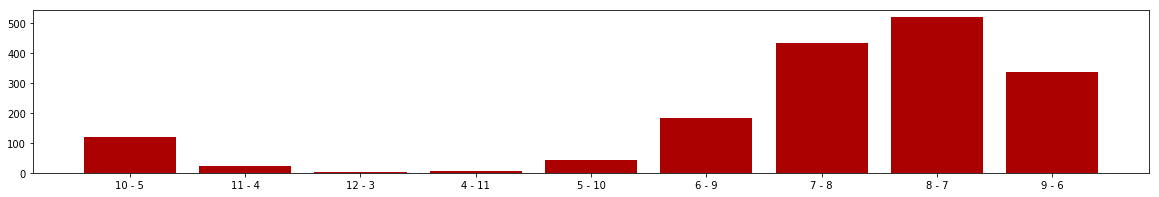

In [38]:
plt.figure(figsize=(20, 3))
plt.bar(d.keys(), d.values(), facecolor='#AA0000')
# plt.grid(True)
# plt.xticks(range(1, len(d) + 1), d.keys())
plt.show()

In [ ]:
# f, ax = plt.subplots()

# index = np.arange(n_groups)
# bar_width = 0.35

ax = plt.bar(d.keys(), d.values(), color='coral', alpha= 0.8)

plt.xlabel('Impares - Pares')
plt.ylabel('Frequencia')
plt.title('Frequencia Impares - Pares', fontsize = 16)
# plt.xticks(len(d.keys()) + bar_width, d.keys())
# plt.legend()

for i in ax.patches:
    ax.text(i.get_x() - .03, i.get_height() + 0.5,
            str(round(100 * i.get_height() / sum(d.values()), 2)) + '%')

# plt.tight_layout()
plt.show()

In [ ]:
padrao_seq = []

for c in concursos:
    if (c.sequencia not in padrao_seq):
        padrao_seq.append(c.sequencia)

In [ ]:
padrao_seq

In [ ]:
imprimir_concursos(concursos[:20])

In [ ]:
d2 = dict.fromkeys(np.arange(1,16), 0)

for c in concursos:
    d2[max(c.sequencia)] += 1
    
d2

# Gerar jogos

In [ ]:
# jogos_nao_salvos = gerar_jogos(100000, menor_numero=(1,2,3,4), maior_numero=(23,24,25))
# len(jogos_nao_salvos)

In [ ]:
# a = 0

# while a < 20:
#     jogos_nao_salvos = gerar_jogos(10000, menor_numero=(1,2,3,4), maior_numero=(23,24,25))
#     salvar_jogos(jogos_nao_salvos)
#     a += 1


In [ ]:
# imprimir_jogo(jogos_nao_salvos)

In [ ]:
start = time.time()
salvar_jogos(jogos_nao_salvos)
end = time.time()
print((end - start)/60)

In [ ]:
# insert_jogo(jogos_nao_salvos[0])

# Jogos

In [ ]:
start = time.time()
jogos_salvos = get_all_jogos()
end = time.time()

print((end - start)/60)
print(len(jogos_salvos))

In [ ]:
jogos_filtrados = jogos

In [ ]:
# for s in seq_inicial_unica:
#     jogos_filtrados = filtrar_jogo_sequencia(jogos_filtrados, s)

# len(jogos_filtrados)

In [ ]:
# for s in seq_final_unica:
#     jogos_filtrados = filtrar_jogo_sequencia(jogos_filtrados, s)

# len(jogos_filtrados)

In [ ]:
jogos_filtrados = filtrar_jogo_menor_maior(jogos_filtrados, (0,1), (25,26))
len(jogos_filtrados)

In [ ]:
jogos_filtrados = filtrar_jogo_impar_par(jogos_filtrados, [7,8])
len(jogos_filtrados)

In [ ]:
jogos_filtrados = filtrar_jogo_por_numeros(jogos_filtrados, [8, 9, 21], 3)
len(jogos_filtrados)

In [ ]:
for c in jogos_filtrados:
    sequencia = []
    count = 0
    
    for i in np.arange(1, len(c.numeros[1:])):
        if c.numeros[i] == c.numeros[i - 1] + 1:
            count += 1
        else:
            if count > 0:
                count += 1
                sequencia.append(count)
                count = 0
            
    c.sequencia = sorted(tuple(sequencia)) 

In [ ]:
jogos_t2 = []

for c in jogos_filtrados:
    if max(c.sequencia) <= 7 or c.sequencia == None:
        jogos_t2.append(c)

In [ ]:
jogos_filtrados = jogos_t2
len(jogos_filtrados)

In [ ]:
jogos_t3 = []
dezenas = np.arange(10,20)

for c in jogos_filtrados:
    if (len(set(c.numeros).intersection(dezenas)) >= 5 and len(set(c.numeros).intersection(dezenas)) <= 7):
        jogos_t3.append(c)

In [ ]:
jogos_filtrados = jogos_t3
len(jogos_filtrados)

In [ ]:
jogos_t4 = []

for c in jogos_filtrados:
    if (len(c.sequencia) >= 3 and len(c.sequencia) <= 5):
        jogos_t4.append(c)
        
len(jogos_t4)

In [ ]:
jogos_filtrados = jogos_t4
len(jogos_filtrados)

In [ ]:
# jogos_t6 = filtrar_jogo_por_numeros(jogos_t5, numeros=[19,20,21,22,23,24,25], match=7)
# len(jogos_t6)

In [ ]:
imprimir_jogo(jogos_filtrados[:100])

In [ ]:
apostas_selecionadas = selecionar_jogos_aposta(jogos_filtrados, 80)

In [ ]:
imprimir_jogo(apostas_selecionadas)

In [ ]:
seq_inicial = []
seq_final = []

for c in concursos:
    if (c.numeros[0] == 1):
        a = []
        
        for n in c.numeros:
            if n <= 5:
                a.append(n)
            
        seq_inicial.append(a)
        
    if (c.numeros[-1] in (24,25)):
        b = []
        
        for o in c.numeros[10:15]:
            if o >= 20:
                b.append(o)
                
        seq_final.append(b)
        
seq_inicial_unica = []
seq_final_unica = []

i = 0

while i < len(seq_inicial):
    if (len(seq_inicial[i]) > 1):
        if (seq_inicial[i] not in seq_inicial_unica):
            seq_inicial_unica.append(seq_inicial[i])
        
    i += 1

    
j = 0

while j < len(seq_final):
    if (len(seq_final[j]) > 1):
        if (seq_final[j] not in seq_final_unica):
            seq_final_unica.append(seq_final[j])
        
    j += 1

In [ ]:
print(sorted(seq_inicial_unica))
print(sorted(seq_final_unica))

In [ ]:
tst = []

for x in sorted(seq_inicial_unica):
    txt = ', '.join([str(y) for y in x])
    tst.append(txt)

print(tst)

In [ ]:
d1 = dict([(k, 0) for k in tst])
print(d1)

In [ ]:
i = 0

while i < len(apostas):
    j = 0
    while j < len(apostas):
        if i != j:
            if len(set(apostas[i].numeros).intersection(apostas[j].numeros)) == 15:
                del apostas[j]
        j += 1
#     print(len(set(a).intersection(apostas[i])))
    i += 1

In [ ]:
i = 0
notin = [[1,2,3,4,5,6,7,8], [18,19,20,21,22,23,24,25]]

while i < len(apostas):
    j = 0
    a = 0
    while j < len(notin):
        if len(set(apostas[i].numeros).intersection(notin[j])) == len(notin[j]):
            a += 1
        j += 1
    
    if (a > 0):
        del apostas[i]
        
    i += 1

In [ ]:
i = 0
final = [23,24,25]

while i < len(apostas):
    if len(set(apostas[i].numeros).intersection(final)) < 2:
        del apostas[i]
        
    i += 1

In [ ]:
i = 0
inicio = [1,2,3]

while i < len(apostas):
    if len(set(apostas[i].numeros).intersection(inicio)) < 2:
        del apostas[i]
        
    i += 1

In [ ]:
i = 0

while i < len(apostas):
    if (apostas[i].impar <= 6 or apostas[i].impar >= 10):
        del apostas[i]
    i += 1

In [ ]:
# !pip install urllib urllib2

In [ ]:
# import urllib

In [ ]:
# page = urllib.request.urlopen("file:///Users/raphael/Documents/GitHub/python_scripts/D_LOTFAC.HTM", 'r')

In [ ]:
# from bs4 import BeautifulSoup

In [ ]:
# soup = BeautifulSoup(page.read(), 'html.parser')

In [ ]:
# soup = BeautifulSoup(page.read(), 'lxml')

In [ ]:
# table = soup.find_all('table')[0]

In [ ]:
# for row in table.find_all('tr'):
#     columns = row.find_all(['td', 'th'])
#     for col in columns:
#         print(col.text())

In [ ]:
# i = 1
# for row in soup.findAll('table')[0].findAll('tr'):
#     concurso = row.findAll('td')
#     print(concurso)
    
#     i += 1

In [ ]:
par_impar_lst = []

for x in concursos:
    par_impar_lst.append([x.impar, x.par])
  
df_v2 = pd.DataFrame(par_impar_lst, columns=['impar', 'par'])
df_v2.set_index(['impar'])
# par_impar_dic = dict(par_impar_lst)
# print(par_impar_dic)

In [ ]:
df_v2_group = df_v2.groupby(['impar', 'par'])['impar'].count()

In [ ]:
df_v2_group

In [ ]:
df_v3 = pd.DataFrame(df_v2_group)

In [ ]:
df_v3['perc'] = [(x*100)/df_v2_group.values.sum() for x in df_v2_group.values]

In [ ]:
df_v3

In [ ]:
menor = []
maior = []
menor_maior_list = []
menor_maior_dict = {}
menor_maior_strg = []

In [ ]:
for x in concursos:
    menor.append(x.numeros[0])
    maior.append(x.numeros[-1])
    menor_maior_list.append([x.numeros[0], x.numeros[-1]])
    menor_maior_strg.append(str(x.numeros[0]) + ' - ' + str(x.numeros[-1]))
#     menor_maior.update({str(x.numeros[0]) + ' - ' + str(x.numeros[-1]): 1})

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
menor_freq = np.histogram(menor, bins=np.arange(1,11))

In [ ]:
menor_perc = [(x * 100)/len(concursos) for x in menor_freq[0]]

In [ ]:
menor_perc

In [ ]:
np.histogram(maior, bins=np.arange(15,26))

In [ ]:
menor_maior_list[:5]

In [ ]:
menor_maior_strg[:5]

In [ ]:
df_menor_maior_list = pd.DataFrame(menor_maior_list, columns=['menor', 'maior'])

In [ ]:
df_menor_maior_list.set_index(['menor', 'maior'])

In [ ]:
menor_maior_freq = df_menor_maior_list.groupby(['menor', 'maior']).count()

In [ ]:
menor_maior_freq.values

In [ ]:
menor_maior_perc = [(x*100)/len(concursos) for x in menor_maior_freq.values]

In [ ]:
df = pd.DataFrame(menor_maior_freq)

In [ ]:
df['percentual'] = menor_maior_perc

In [ ]:
df

In [ ]:
df_menor_maior_str = pd.DataFrame(menor_maior_strg, columns=['col'])

In [ ]:
menor_maior_group = df_menor_maior_str.groupby('col')['col'].count()

In [ ]:
df_v1 = pd.DataFrame(menor_maior_group)

In [ ]:
df_v1

In [ ]:
# plt.hist(df_v1)
# plt.show()

In [ ]:
# np.histogram(menor_maior)

In [ ]:
# plt.hist([menor, maior], bins=np.arange(1,26))
# plt.xlabel('Menor Numero Sorteado')
# plt.ylabel('Frequencia')
# plt.grid(True)
# plt.show()

In [ ]:
numeros_aposta = []
qtd_total_apostas = 30000
qtd_apostas = 0

while (qtd_apostas < qtd_total_apostas):
    num_tmp = sorted(list(np.random.choice(np.arange(1, 26), 15, replace= False)))
    numeros_aposta.append(num_tmp)
    qtd_apostas += 1

In [ ]:
print(len(numeros_aposta))

In [ ]:
numeros_aposta[0]

In [ ]:
for a in apostas:
    print(a.numeros)

In [ ]:
# gravar_jogo(apostas)

In [ ]:
# from __future__ import print_function
 
# import MySQLdb as my
 
# try:
 
#     db = my.connect(host="127.0.0.1",
#                     user="root",
#                     passwd="",
#                     db="world"
#                     )
 
#     cursor = db.cursor()
 
#     sql = "select * from city where id < 10"
#     number_of_rows = cursor.execute(sql)
 
#     print(cursor.fetchone())  # fetch the first row only
 
#     db.close()
 
# except my.DataError as e:
#     print("DataError")
#     print(e)
 
# except my.InternalError as e:
#     print("InternalError")
#     print(e)
 
# except my.IntegrityError as e:
#     print("IntegrityError")
#     print(e)
 
# except my.OperationalError as e:
#     print("OperationalError")
#     print(e)
 
# except my.NotSupportedError as e:
#     print("NotSupportedError")
#     print(e)
 
# except my.ProgrammingError as e:
#     print("ProgrammingError")
#     print(e)
 
# except :
#     print("Unknown error occurred")

In [ ]:
from reportlab.pdfgen import canvas
from reportlab.lib.units import cm
from reportlab.graphics.shapes import Rect
from reportlab.lib.colors import black

In [ ]:
c = canvas.Canvas("formulario.pdf", pagesize=(8.3*cm, 18.8*cm))
# c.drawString(100,750, "Bem vindo ao reportlab!")
# c.setFillColor()
# c.setPageTransition(cm)

# c.rect(1.1*cm, 13.6*cm, 0.5*cm, 0.3*cm, fill=1)
# c.rect(2.4*cm, 13.6*cm, 0.5*cm, 0.3*cm, fill=1)
# c.rect(3.7*cm, 13.6*cm, 0.5*cm, 0.3*cm, fill=1)
# c.rect(5*cm, 13.6*cm, 0.5*cm, 0.3*cm, fill=1)
# c.rect(6.3*cm, 13.6*cm, 0.5*cm, 0.3*cm, fill=1)

# c.rect(1.1*cm, 13.2*cm, 0.5*cm, 0.3*cm, fill=1)
# c.rect(2.4*cm, 13.2*cm, 0.5*cm, 0.3*cm, fill=1)
# c.rect(3.7*cm, 13.2*cm, 0.5*cm, 0.3*cm, fill=1)
# c.rect(5*cm, 13.2*cm, 0.5*cm, 0.3*cm, fill=1)
# c.rect(6.3*cm, 13.2*cm, 0.5*cm, 0.3*cm, fill=1)

c.rect(1.1*cm, 8.55*cm, 0.5*cm, 0.3*cm, fill=1)
c.rect(2.4*cm, 8.55*cm, 0.5*cm, 0.3*cm, fill=1)
c.rect(3.7*cm, 8.55*cm, 0.5*cm, 0.3*cm, fill=1)
c.rect(5.0*cm, 8.55*cm, 0.5*cm, 0.3*cm, fill=1)
c.rect(6.3*cm, 8.55*cm, 0.5*cm, 0.3*cm, fill=1)

c.rect(1.1*cm, 8.1*cm, 0.5*cm, 0.3*cm, fill=1)
c.rect(2.4*cm, 8.1*cm, 0.5*cm, 0.3*cm, fill=1)
c.rect(3.7*cm, 8.1*cm, 0.5*cm, 0.3*cm, fill=1)
c.rect(5.0*cm, 8.1*cm, 0.5*cm, 0.3*cm, fill=1)
c.rect(6.3*cm, 8.1*cm, 0.5*cm, 0.3*cm, fill=1)

c.rect(1.1*cm, 7.65*cm, 0.5*cm, 0.3*cm, fill=1)
c.rect(2.4*cm, 7.65*cm, 0.5*cm, 0.3*cm, fill=1)
c.rect(3.7*cm, 7.65*cm, 0.5*cm, 0.3*cm, fill=1)
c.rect(5.0*cm, 7.65*cm, 0.5*cm, 0.3*cm, fill=1)
c.rect(6.3*cm, 7.65*cm, 0.5*cm, 0.3*cm, fill=1)

c.rect(1.1*cm, 7.2*cm, 0.5*cm, 0.3*cm, fill=1)
c.rect(2.4*cm, 7.2*cm, 0.5*cm, 0.3*cm, fill=1)
c.rect(3.7*cm, 7.2*cm, 0.5*cm, 0.3*cm, fill=1)
c.rect(5.0*cm, 7.2*cm, 0.5*cm, 0.3*cm, fill=1)
c.rect(6.3*cm, 7.2*cm, 0.5*cm, 0.3*cm, fill=1)

c.rect(1.1*cm, 6.75*cm, 0.5*cm, 0.3*cm, fill=1)
c.rect(2.4*cm, 6.75*cm, 0.5*cm, 0.3*cm, fill=1)
c.rect(3.7*cm, 6.75*cm, 0.5*cm, 0.3*cm, fill=1)
c.rect(5.0*cm, 6.75*cm, 0.5*cm, 0.3*cm, fill=1)
c.rect(6.3*cm, 6.75*cm, 0.5*cm, 0.3*cm, fill=1)

# c.rect(1,520,22,13, fill=1)
# c.rect(220,520,22,13, fill=1)
# c.rect(0,0,8.3*cm,18.8*cm, fill=0)
c.save()

# Conferencia

In [ ]:
def verificar_apostas(data_sorteio):
    try:
        concurso
        
    except Exception as ex:
        print(ex)
    

# Teste

In [ ]:
total = 0

for jogo in jogos_salvos:
    for c in concursos:
        if len(set(jogo.numeros).intersection(c.numeros)) == 15:
            print("Concurso: ", c.id)
            print("ID Aposta: ", jogo.id)
            print("Data Sorteio: ", c.data_sorteio)
#             print(jogo.numeros)
            print(c.numeros)
            print("\n")
            total += 1
            break
            
print('total jogos ganahdores: %s' % (total))

In [88]:
jogos = []
    
for a in np.arange(1, 26 - 14):
    if (a > 1):
        break
        
    for b in np.arange(a + 1, 26 - 13):
        for c in np.arange(b + 1, 26 - 12):
            for d in np.arange(c+1, 26 - 11):
                for e in np.arange(d+1, 26 - 10):
                    for f in np.arange(e+1, 26 - 9):
                        for g in np.arange(f+1, 26 - 8):
                            for h in np.arange(g+1, 26 - 7):
                                for i in np.arange(h+1, 26 - 6):
                                    for j in np.arange(i+1, 26 - 5):
                                        for k in np.arange(j+1, 26 - 4):
                                            for l in np.arange(k+1, 26 - 3):
                                                for m in np.arange(l+1, 26 - 2):
                                                    for n in np.arange(m+1, 26 - 1):
                                                        for o in np.arange(n+1, 26 - 0):
                                                            jogo = Jogo()
                                                            num = (a, b, c, d, e, f, g, h, i, j, k, l, m, n, o)
                                                            jogo.set_numeros(num)
                                                            jogos.append(jogo)

IndexError: list index out of range

In [66]:
print(len(jogos))

0
